In [1]:
import numpy as np

In [2]:
import sys

In [3]:
sys.path.append("../utils/")

In [4]:
import graph_transformation as gt 
import plot_utils as pu
import pickle

from tqdm import tqdm_notebook

In [5]:
from importlib import reload

In [8]:
gt = reload(gt)

In [6]:
embs = np.load("../../data/gnn_prepared/embs.npy")
targets = np.load("../../data/gnn_prepared/target.npy")

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
embs_tr, embs_te, targets_tr, targets_te = train_test_split(embs, targets, shuffle = 1)

In [9]:
embs[0].shape

(307, 5)

In [10]:
embs_te[0].shape

(264, 5)

In [11]:
embs_tr = np.vstack(embs_tr)
embs_te = np.vstack(embs_te)
targets_tr = np.hstack(targets_tr)
targets_te = np.hstack(targets_te)

## Prep ES

In [15]:
import os
import pickle

In [16]:
es_answ_list = pickle.load(open("../../data/answers/ES_answers_50", 'rb'))

In [17]:
def lists_to_gr(lists, n):
    gr = np.zeros((n,n))
    for arr in lists:
        for a,b in zip(arr, arr[1:]):
            gr[a, b] = 1
            
    return gr

In [18]:
path = "../../data/graphs/ES/"
files = sorted(os.listdir(path))

In [19]:
files

['1.npy', '2.npy', '3.npy', '4.npy']

In [20]:
ES_x = []
for f in files:
    ES_x.append(np.load(path + f)[:36, :36])


In [21]:
ES_x = [ES_x[0][:19,:19], ES_x[1][:19,:19],ES_x[2][:36,:36],ES_x[3][:36,:36],]

In [22]:
ES_y = [lists_to_gr(es_answ_list[i], ES_x[i].shape[0]) for i in range(4)]

In [23]:
print(322)

322


In [24]:
es_embs = []
es_targets = []
es_p = []

for x, y in zip(ES_x, ES_y):
    adj, emb, t, p = gt.process_graph(x, y)
    
    es_embs.append(emb)
#     adjs.append(adj)
    es_targets.append(t)
    es_p.append(sorted(p.keys()))

In [25]:
es_embs_all = np.vstack(es_embs)
es_targets_all = np.hstack(es_targets)

In [26]:
embs_tr.shape

(182655, 5)

## ML

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
#lr = LogisticRegression()
#lr = SVC()
lr = GradientBoostingClassifier()

In [14]:
embs_tr[::200].shape

(914, 5)

In [15]:
lr.fit(embs_tr[::,1:], targets_tr[::])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [16]:
pred_proba = lr.predict_proba(embs_te[:,1:])[:,1]
#pred_proba = lr.predict(embs_te[:,1:])

In [17]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [18]:
print(roc_auc_score(targets_te, pred_proba))
print(accuracy_score(targets_te, pred_proba > 0.5))

0.9999999946043938
0.9999672785576388


In [39]:
ind = 2

In [40]:
es_proba = lr.predict_proba(es_embs[ind][:, 1:])[:, 1]

In [41]:
print(roc_auc_score(es_targets[ind], es_proba))
print(accuracy_score(es_targets[ind], es_proba > 0.5))

0.9999426078971534
0.9964349376114082


In [19]:
import pickle

In [ ]:
pickle.dump()

In [42]:
def pairs_to_gr(pairs, n):
    gr = np.zeros((n,n))
    
    for p in pairs:
        gr[p[0], p[1]] = 1
    return gr

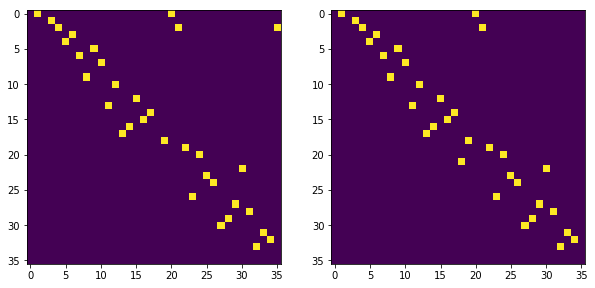

In [43]:
pu.plot_grs(pairs_to_gr(np.array(es_p[ind])[(es_proba > 0.5).astype(bool)], 36), ES_y[ind])

In [135]:
es_answ_list[ind]

[[2, 21, 18, 19, 22, 30, 27, 29, 28, 31, 33, 32, 34],
 [0, 20, 24, 26, 23, 25],
 [0, 1, 3, 6, 7, 10, 12, 15, 16, 14, 17, 13, 11],
 [2, 4, 5, 9, 8]]

In [155]:
es_proba = lr.predict_proba(es_embs_all[:, 1:])[:, 1]
#es_proba = lr.predict(es_embs_all[:, 1:])

In [156]:
print(roc_auc_score(es_targets_all, es_proba))
print(accuracy_score(es_targets_all, es_proba > 0.5))

0.9992519564216664
0.9964580873671782


In [123]:
 ES_x[2]

array([[  9.00000000e+00,   9.07400000e+03,   9.10000000e+01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.10000000e+01,   1.70000000e+01,   5.90000000e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.55000000e+02,   1.26000000e+02,   3.00000000e+00, ...,
          1.00000000e+00,   2.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   5.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [45]:
(lr.predict(val_x[:,1:]) == val_y).sum() / len(val_y)

0.9987600869971747

In [73]:
def process_graph(name, path="../../data/graphs/", log = 0, cut = 35):
    graph = np.load(path + name + ".npy")
    if log:
        graph = np.log(1 + graph[:cut, :cut])
    else:
        graph = graph[:cut, :cut]
        
    pairs, p_to_n, n_to_p, N = gr_to_pairs(graph)
    gr_x = make_vertexes_embs(graph, p_to_n)
    
    np.save("../../data/gnn_prepared/" + name + "_emb" , gr_x)
    np.save("../../data/gnn_prepared/" + name + "_adj", pairs_to_sparse_gr(p_to_n)[0])
    
    return graph, p_to_n, gr_x

In [93]:
gr, p_to_n, _  = process_graph("ES3_22", log = 0)

In [94]:
answ = np.load("../../data/gnn_prepared/answ_ES3.npy")[:,1]

In [87]:
p_to_n[(3,7)]

95

In [88]:
answ[95]

0.6395562

<Container object of 35 artists>

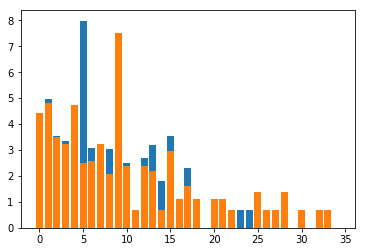

In [86]:
plt.bar(np.arange(35), gr[:,7])
plt.bar(np.arange(35), gr[:,10])

<Container object of 35 artists>

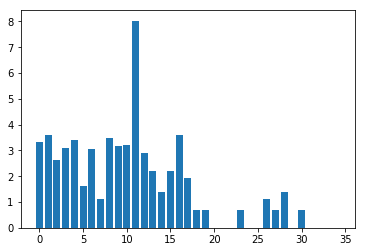

In [85]:
plt.bar(np.arange(35), gr[7])

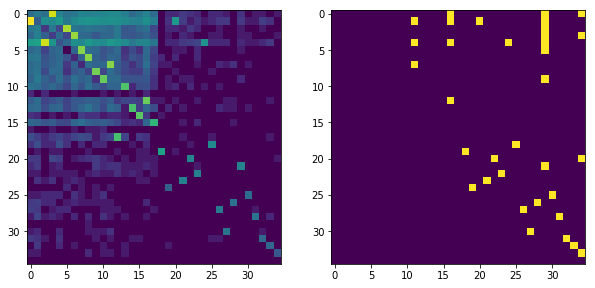

In [98]:
pu.plot_grs(gr, pairs_to_gr(np.array([x for x in p_to_n.keys()])[answ > 0.0001]), log = 1, all_ticks=1)

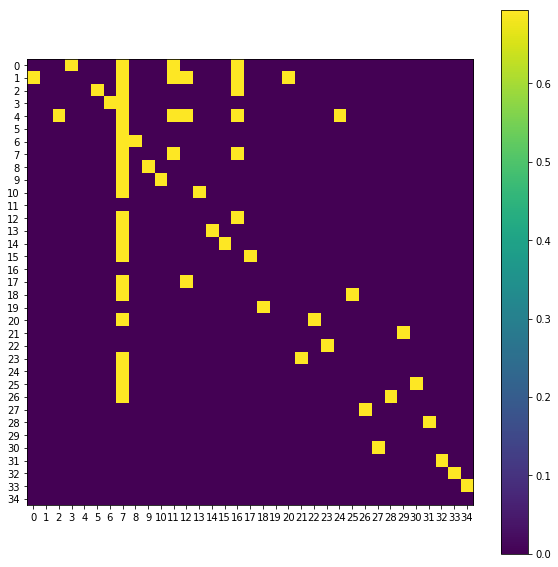

In [77]:
pu.plot_gr(pairs_to_gr(np.array([x for x in p_to_n.keys()])[answ > 0.5]), log = 1, all_ticks=1, s = 10)

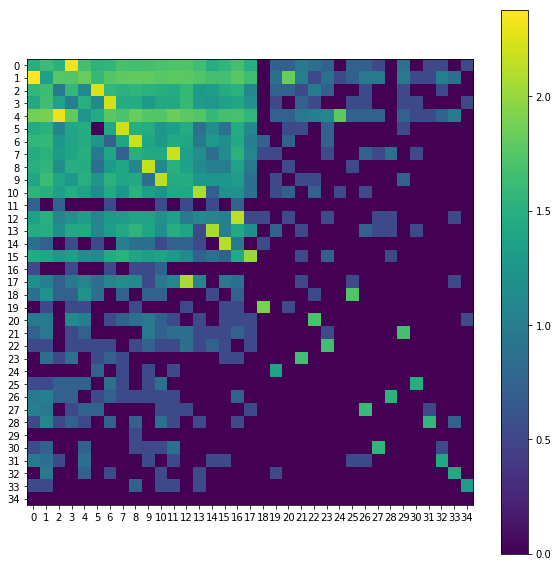

In [78]:
pu.plot_gr(gr, log = 1, all_ticks=1, s = 10)

In [25]:
def pairs_to_gr(pairs, N = None):
    if N == None:
        N = 0
        for p in pairs:
            N = max(N, max(p))
        N+=1
    
    gr = np.zeros((N, N))
    for p in pairs:
        gr[p[0],p[1]] = 1
    return gr

In [120]:
np.save("../../data/graphs/clostridium_1_3_answ.npy",pairs_to_gr(np.array([x for x in p_to_n.keys()])[lr.predict(gr_x[:,1:]) == 1]) )

In [29]:
import hamiltonian_utils as hamu

In [32]:
hamu.restore_arrays(graph)[0]

[[1, 0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16],
 [49, 4, 2, 5, 7, 11],
 [24, 19, 18, 25, 30, 27, 26, 28, 31, 32, 33, 34],
 [20, 22, 23, 21, 29],
 [50, 51],
 [46, 40, 47]]

In [162]:
import matplotlib.pyplot as plt

In [46]:
plt.scatter(gr_x[lr.predict(gr_x[:,1:3]) == 1,1], gr_x[lr.predict(gr_x[:,1:3]) == 1, 2])
plt.scatter(gr_x[lr.predict(gr_x[:,1:3]) == 0,1], gr_x[lr.predict(gr_x[:,1:3]) == 0, 2])

NameError: name 'gr_x' is not defined

In [164]:
p_to_n[(1,19)]

44

In [166]:
gr_x[44]

array([1.02000000e+02, 9.77573318e-03, 8.57142857e-01, 1.72588832e-01,
       1.20000000e+00])

In [94]:
import viz_utils as vu

In [ ]:
f = vu.plot_graphs(answ_1_gr, pos, answ_2_gr, pos, arrays_gr, shift_pos, node_size=300, figsize=(15, 20))